# Contextualização

![](https://media-exp1.licdn.com/dms/image/C4E12AQGbAM-_eriLMw/article-cover_image-shrink_720_1280/0/1632916005843?e=1669248000&v=beta&t=Jrz7HA1m-Qbhm08T89CaeaESJnsodVxsetVxJHVsVKM)

[Fonte da imagem](https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini/)

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>


# Setup

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

Apps de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Agrupa apenas pontos próximos entre si

Por quê não utilizar dummies no algoritmo? Vide:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## Simulated Data

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-5.039405,2.891648
1,-4.453512,3.496162
2,5.274361,1.464998
3,7.493971,4.809172
4,-4.987663,2.701800


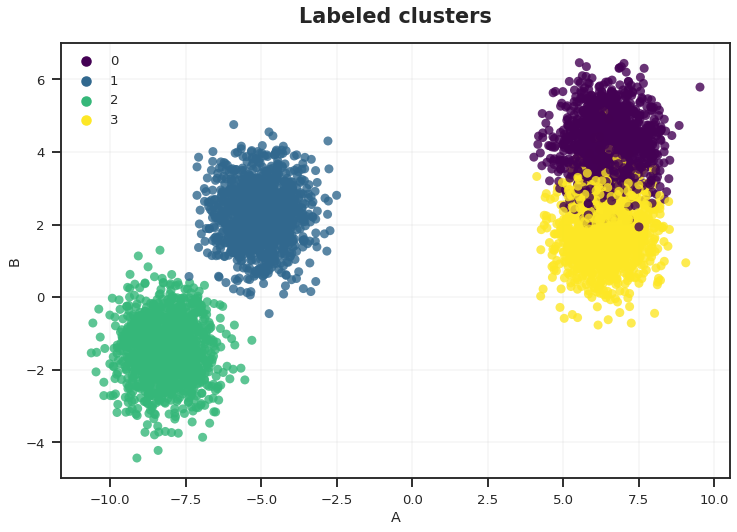

In [ ]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [ ]:
# Usando função
centroids, labels, intertia = k_means(X, n_clusters=4)

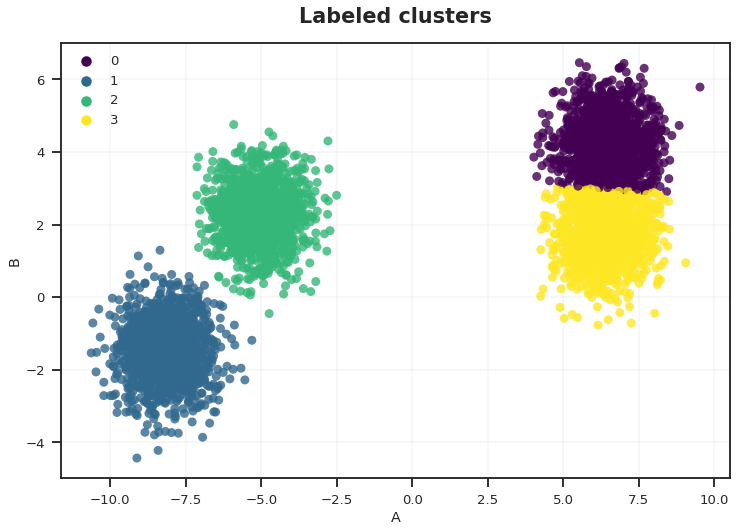

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [ ]:
# Using KMeans
model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

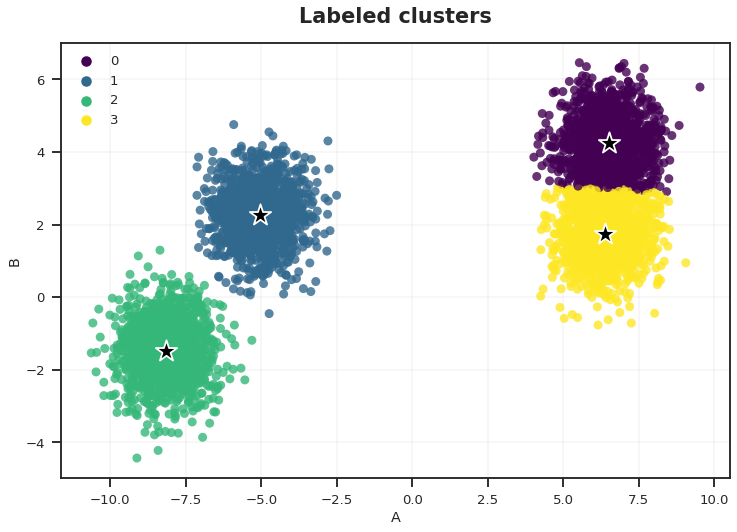

In [ ]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

## Model evaluation

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- WCSS
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

Exemplo de aplicação:

In [ ]:
# sklearn metrics
silhouette_score(X, labels)
davies_bouldin_score(X, labels)
calinski_harabasz_score(X, labels)

64109.18063720647

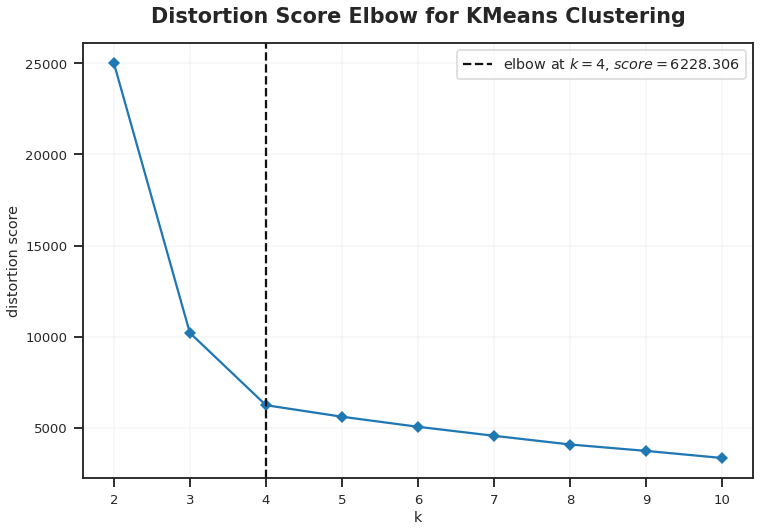

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adfbb61d0>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), X, k=10, timings=False)

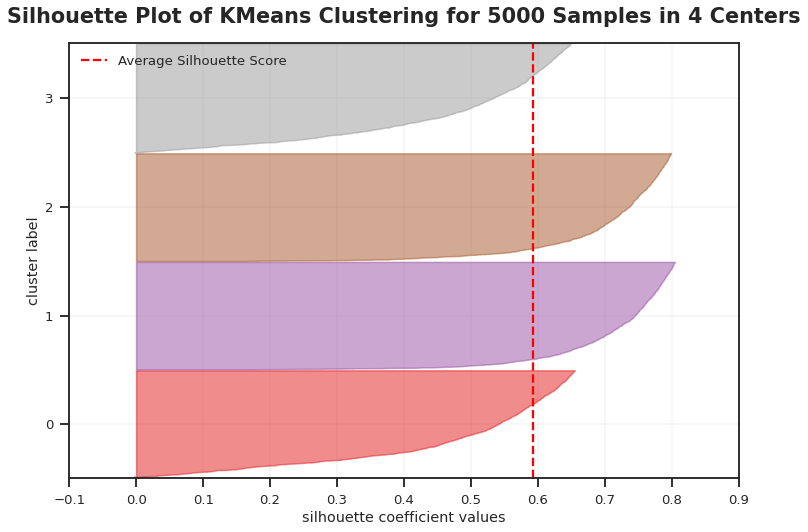

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adf9e6310>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
# silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=4), X)

Testando distintos agrupamentos:

In [ ]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

[{'k': 2,
  'inertia': 25043.514259015712,
  'silhouette_score': 0.8003601174218811,
  'davies_bouldin_score': 0.30798067620923564,
  'calinski_harabasz_score': 44095.88812467321},
 {'k': 3,
  'inertia': 10202.720509127139,
  'silhouette_score': 0.7638666810706567,
  'davies_bouldin_score': 0.347403606900803,
  'calinski_harabasz_score': 57742.17262675821},
 {'k': 4,
  'inertia': 6228.33915002352,
  'silhouette_score': 0.5930511336662388,
  'davies_bouldin_score': 0.5974496883476283,
  'calinski_harabasz_score': 64109.55973844229},
 {'k': 5,
  'inertia': 5592.018219022313,
  'silhouette_score': 0.5218326712485215,
  'davies_bouldin_score': 0.7967850075965448,
  'calinski_harabasz_score': 53691.39899371343},
 {'k': 6,
  'inertia': 5049.402376838056,
  'silhouette_score': 0.4138796568818412,
  'davies_bouldin_score': 1.0137210111142725,
  'calinski_harabasz_score': 47675.67596971707},
 {'k': 7,
  'inertia': 4537.94606343477,
  'silhouette_score': 0.3234585981775209,
  'davies_bouldin_sco

In [ ]:
# Create dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,25043.514259,0.800360,0.307981,44095.888125
3,10202.720509,0.763867,0.347404,57742.172627
4,6228.339150,0.593051,0.597450,64109.559738
5,5592.018219,0.521833,0.796785,53691.398994
6,5049.402377,0.413880,1.013721,47675.675970
7,4537.946063,0.323459,1.172725,44292.660112
8,4054.388137,0.317862,1.159569,42562.227554
9,3697.645423,0.316798,1.105643,40892.659201
10,3327.813864,0.323783,1.013110,40447.603774


In [ ]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,25043.514259,0.800360,0.307981,44095.888125
3,10202.720509,0.763867,0.347404,57742.172627
4,6228.339150,0.593051,0.597450,64109.559738
5,5592.018219,0.521833,0.796785,53691.398994
6,5049.402377,0.413880,1.013721,47675.675970
7,4537.946063,0.323459,1.172725,44292.660112
8,4054.388137,0.317862,1.159569,42562.227554
9,3697.645423,0.316798,1.105643,40892.659201
10,3327.813864,0.323783,1.013110,40447.603774


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.13176893, 0.22330232],
       [0.52583752, 0.95593534],
       [0.33736707, 0.25988535],
       ...,
       [0.04406035, 0.80699123],
       [0.06524768, 0.54336362],
       [0.93820765, 0.65808437]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


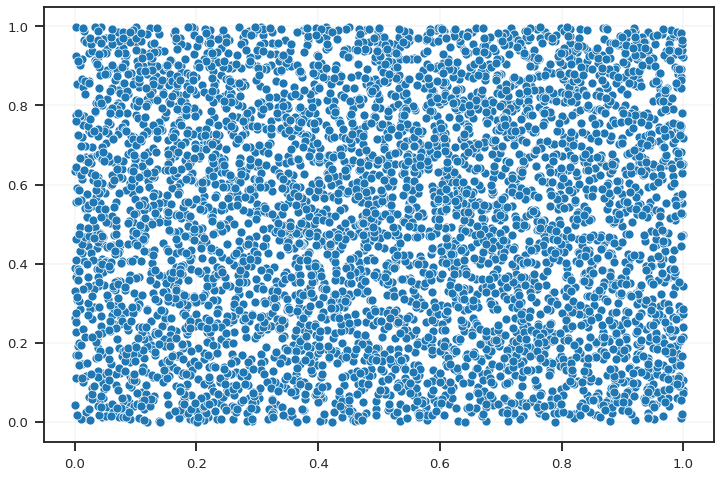

In [ ]:
sns.scatterplot(X_random[:,0], X_random[:,1])

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,519.909170,0.354112,1.182312,3019.502691
3,329.737712,0.378109,0.863112,3820.969774
4,208.857960,0.408891,0.769617,4984.636483
5,173.376072,0.395410,0.830599,4758.270111
6,147.615618,0.380633,0.831742,4644.334882
7,126.089083,0.370305,0.820153,4672.192977
8,106.777209,0.365152,0.816136,4857.045614
9,92.250721,0.365379,0.792254,5016.446813
10,84.736730,0.365332,0.818866,4902.721057


In [ ]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,519.909170,0.354112,1.182312,3019.502691
3,329.737712,0.378109,0.863112,3820.969774
4,208.857960,0.408891,0.769617,4984.636483
5,173.376072,0.395410,0.830599,4758.270111
6,147.615618,0.380633,0.831742,4644.334882
7,126.089083,0.370305,0.820153,4672.192977
8,106.777209,0.365152,0.816136,4857.045614
9,92.250721,0.365379,0.792254,5016.446813
10,84.736730,0.365332,0.818866,4902.721057


Comparando de forma interativa:

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

## High dimensional data

In [ ]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [ ]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


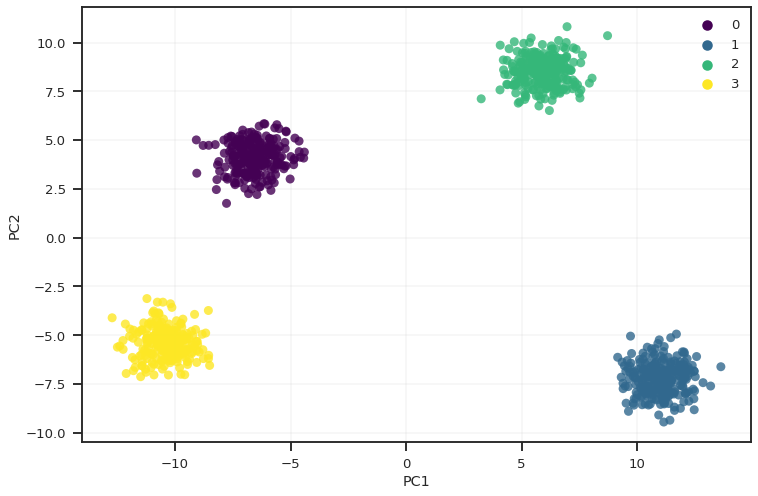

In [ ]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

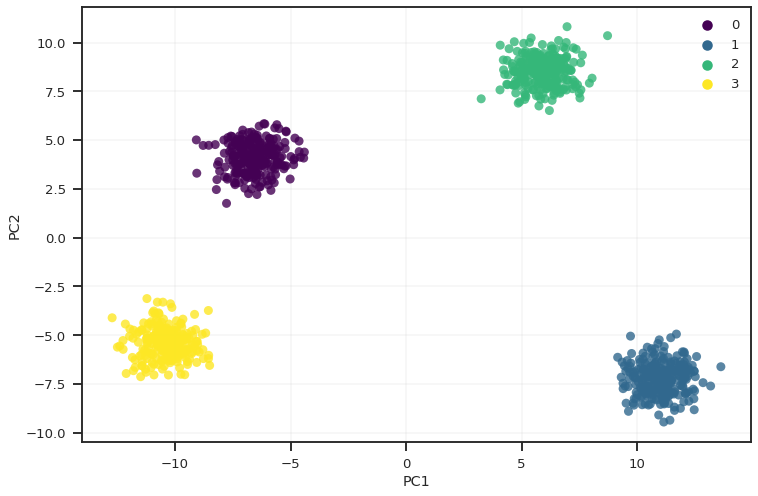

In [ ]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [ ]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

# Hierarchical clustering

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Dendograma fica com visualização inviável para muitas amostras
 

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [ ]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

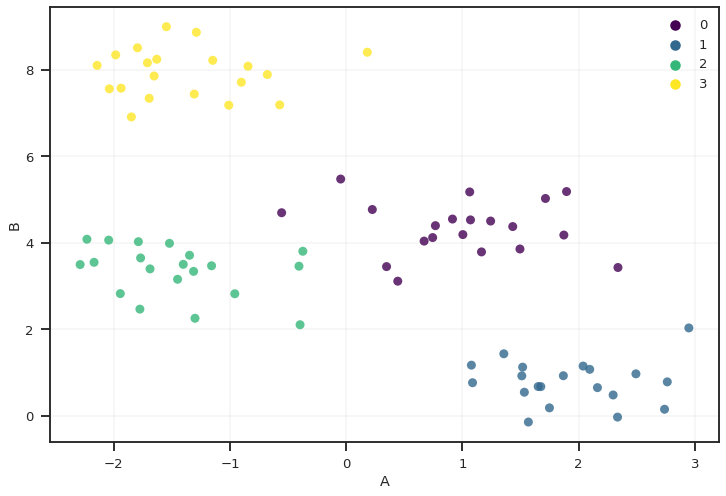

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

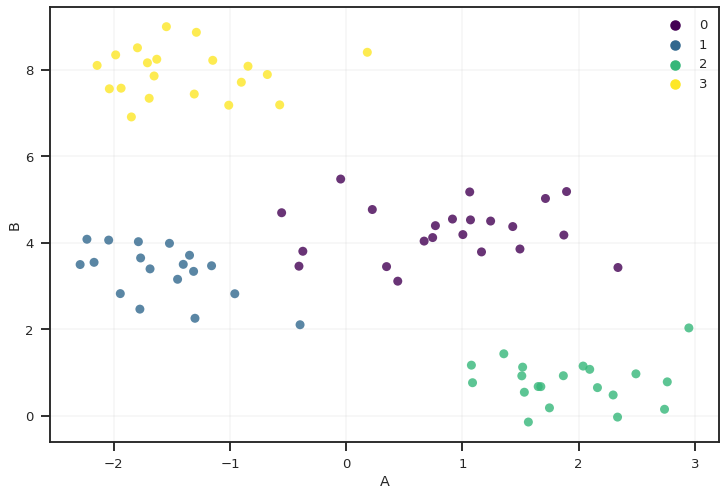

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
# Hierarchical clustering with scipy

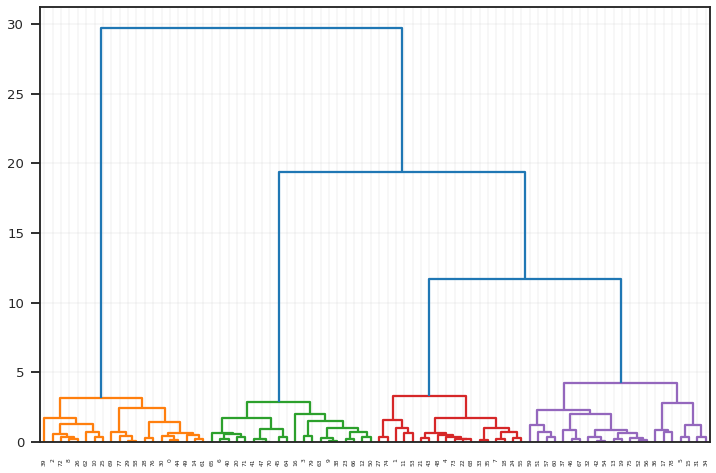

In [ ]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [ ]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

# DBSCAN

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


In [ ]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [ ]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

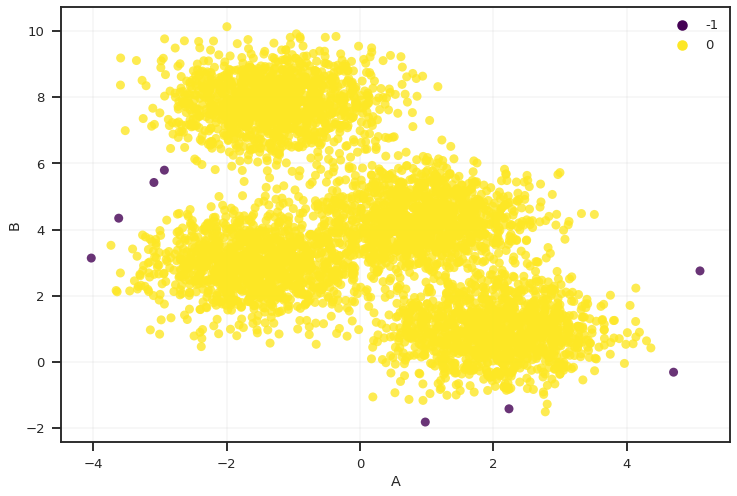

In [ ]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10')
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

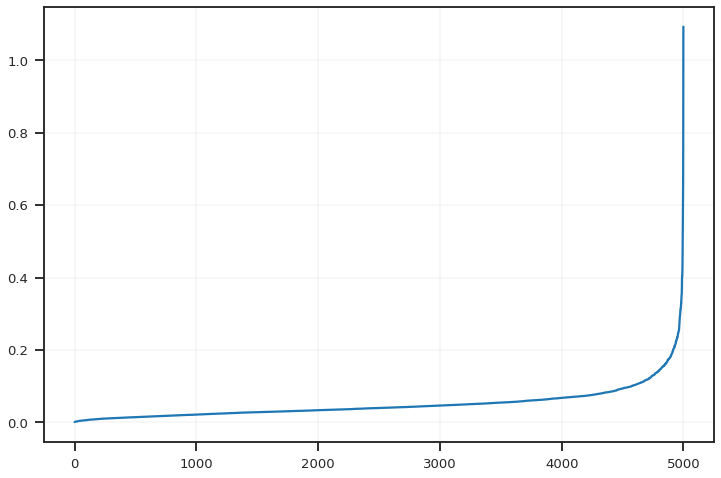

In [ ]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

# MeanShift

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- Não é possível especificar número de clusters

In [ ]:
# Simulate clusters
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


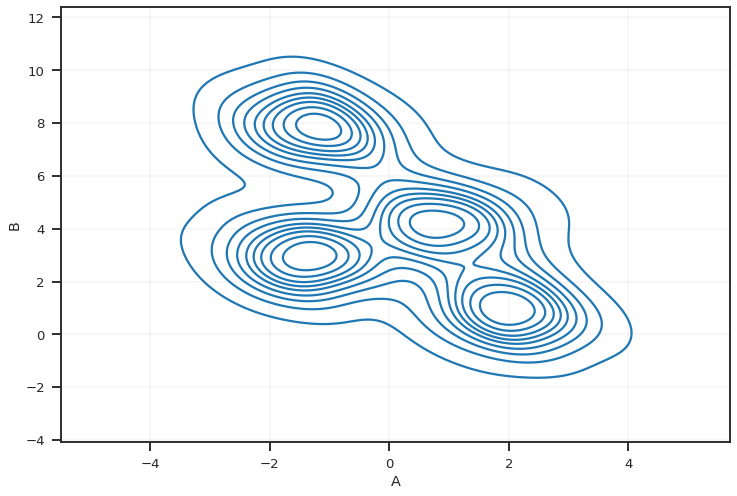

In [ ]:
# Density plot
sns.kdeplot(data=df, x='A', y='B');

In [ ]:
# Model & labels
model = MeanShift()
labels = model.fit_predict(X)

In [ ]:
# Estimating bandwidth
estimate_bandwidth(X)

2.822735629625506

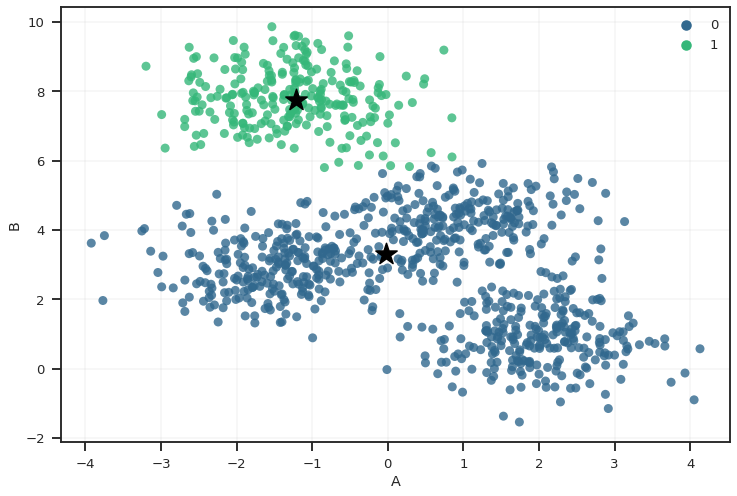

In [ ]:
# Plot
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()

In [ ]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(X)
  ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

# Gaussian Mixture

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [ ]:
# Create model
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [ ]:
# Model attributes
model.means_
model.covariances_
model.weights_

array([0.2521594 , 0.25101906, 0.247801  , 0.24902054])

In [ ]:
# Model BIC
model.bic(X)

7475.928561883233

In [ ]:
# Predict labels
model.predict(X)[:5]

array([1, 3, 1, 2, 0])

In [ ]:
# Predict labels' probability
model.predict_proba(X)[:5]

array([[4.47036452e-22, 9.99999993e-01, 1.06690606e-09, 5.43870188e-09],
       [2.57137974e-04, 9.63882315e-07, 1.87001920e-02, 9.81041706e-01],
       [2.49568344e-25, 1.00000000e+00, 9.41302197e-12, 4.11129219e-11],
       [8.71070480e-09, 8.40546996e-12, 9.99980760e-01, 1.92312544e-05],
       [9.99927378e-01, 2.93030421e-19, 9.56574332e-07, 7.16656227e-05]])

In [ ]:
model.means_.T

array([[ 0.91251225, -1.47074945, -1.28890206,  1.9950502 ],
       [ 4.26878154,  2.9161483 ,  7.85197967,  0.85843856]])

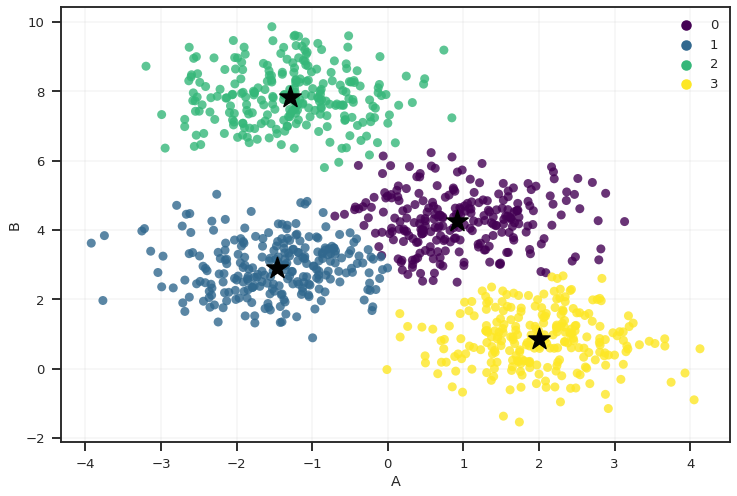

In [ ]:
# Plot
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [ ]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,8357.218909,1,full
1,8357.218909,1,tied
2,8679.299153,1,diag
3,8889.310673,1,spherical
4,7976.527656,2,full
5,8165.511057,2,tied
6,8050.082533,2,diag
7,8036.917677,2,spherical
8,7526.397339,3,full
9,7736.189981,3,tied


In [ ]:
results.sort_values('bic').head()

,bic,n_components,covariance_type
13,7419.260030,4,tied
15,7426.425803,4,spherical
17,7442.077500,5,tied
14,7450.139988,4,diag
19,7453.369260,5,spherical


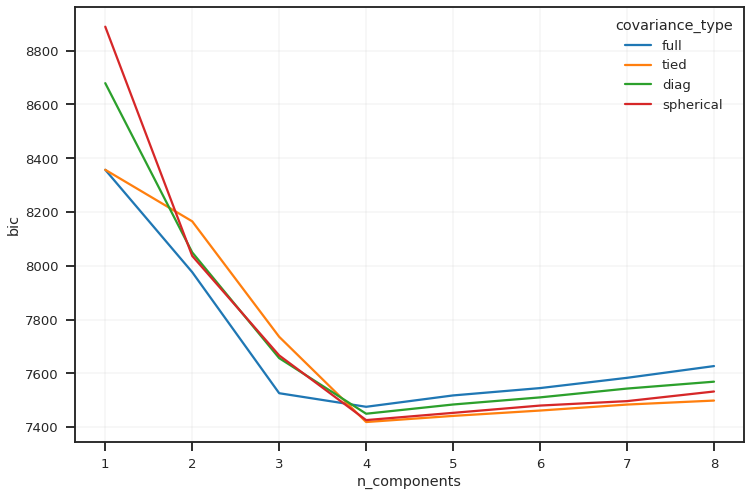

In [ ]:
# Plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

# Dataset with mix data

**Clustering com dados categóricos:**
- kmodes (apenas dados categóricos)
- kprototypes (dados numéricos e categóricos)
- hierarquical clustering com Glower' distance

**Análises de associação / redução de dimensionalidade:**
- Análise de correspondência simples (CA) - apenas dados categóricos com 2 variáveis
- Análise de correspondência múltipla (MCA) - apenas dados categóricos com 2 ou mais variáveis
- FAMD - dados mistos

## Dados categóricos

In [ ]:
from yellowbrick.datasets import load_mushroom

In [ ]:
# Load data
df_mushroom = load_mushroom()[0]
df_mushroom

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


In [ ]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

[0 1 0 ... 1 0 0]
8851.0


In [ ]:
# Avaliando modelo
custos = [KModes(n_clusters=K).fit(df_mushroom).cost_ for K in range(2,11)]
custos

[11560.0, 10343.0, 8851.0, 8111.0, 7203.0, 6708.0, 6416.0, 6190.0, 5882.0]

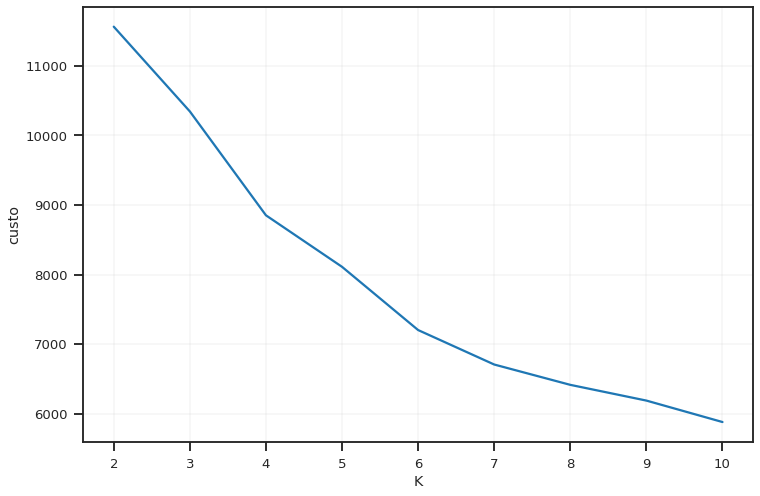

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

## Dados mistos

Fonte e dicionário do dataset: [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [ ]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical=categorical_idx)

KPrototypes(gamma=0.5)

In [ ]:
model.predict(df_diabetes, categorical=categorical_idx)

array([0, 1, 1, 2, 2, 5, 2, 1, 5, 5, 2, 2, 2, 7, 5, 1, 2, 0, 1, 5, 5, 1,
       1, 5, 1, 5, 5, 6, 3, 1, 1, 7, 1, 2, 6, 1, 2, 5, 5, 3, 2, 2, 6, 2,
       2, 2, 1, 2, 6, 2, 2, 7, 0, 1, 5, 1, 1, 2, 1, 2, 7, 2, 1, 1, 5, 1,
       6, 1, 1, 7, 2, 7, 1, 2, 1, 2, 2, 5, 1, 7, 1, 2, 7, 2, 6, 3, 7, 1,
       7, 7, 1, 5, 1, 2, 1, 6, 3, 7, 2, 2, 1, 0, 5, 1, 1, 7, 5, 2, 1, 2,
       3, 5, 5, 1, 2, 1, 1, 6, 1, 2, 4, 2, 1, 2, 1, 1, 1, 5, 1, 7, 5, 2,
       2, 1, 2, 2, 7, 7, 6, 4, 2, 2, 1, 7, 5, 5, 1, 5, 1, 1, 0, 7, 5, 5,
       1, 7, 1, 1, 7, 2, 2, 2, 1, 1, 1, 4, 0, 0, 0, 0, 2, 1, 2, 0, 0, 6,
       7, 2, 6, 4, 4, 4, 2, 0, 0, 2, 7, 4, 1, 1, 2, 6, 6, 0, 0, 3, 0, 7,
       4, 7, 1, 0, 4, 3, 0, 2, 6, 0, 6, 5, 7, 0, 6, 3, 6, 3, 4, 4, 0, 2,
       3, 0, 2, 3, 6, 0, 4, 6, 5, 4, 1, 3, 3, 4, 4, 2, 2, 2, 7, 2, 4, 5,
       0, 4, 6, 2, 3, 5, 5, 0, 0, 6, 4, 7, 5, 2, 0, 6, 5, 1, 5, 7, 4, 7,
       6, 7, 3, 6, 4, 4, 2, 0, 4, 7, 6, 1, 4, 7, 2, 0, 4, 6, 0, 1, 0, 4,
       5, 5, 4, 6, 5, 0, 0, 5, 6, 0, 7, 4, 4, 6, 0,

In [ ]:
# Avaliando modelo
model.cost_

1056.8976344488635

In [ ]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

[1566.2403908950237,
 1401.6822323513516,
 1297.1104292766374,
 1207.0685702439155,
 1147.0796713754228,
 1097.9354201474093,
 1052.8789326323583,
 1020.0912931889748,
 979.3579317115184]

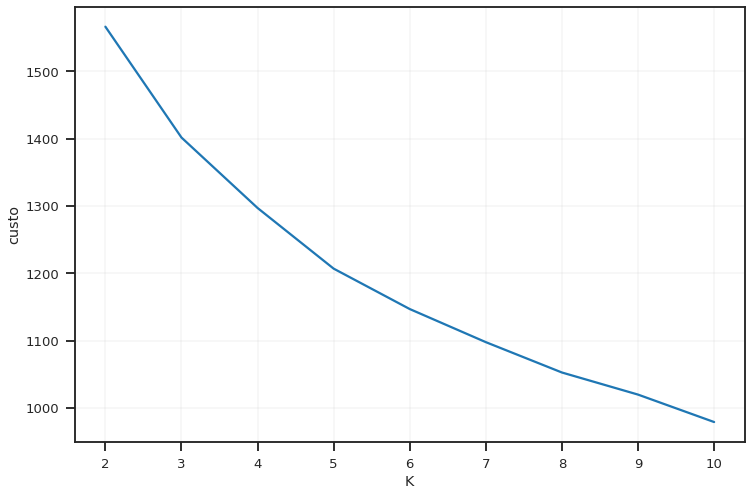

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

# Wine dataset

## Carregando dados

In [ ]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Data cleaning

In [ ]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Há dados duplicados?

In [ ]:
df_wines.duplicated().any()

False

Há dados faltantes?

In [ ]:
df_wines.isna().sum().any()

False

Há outliers?

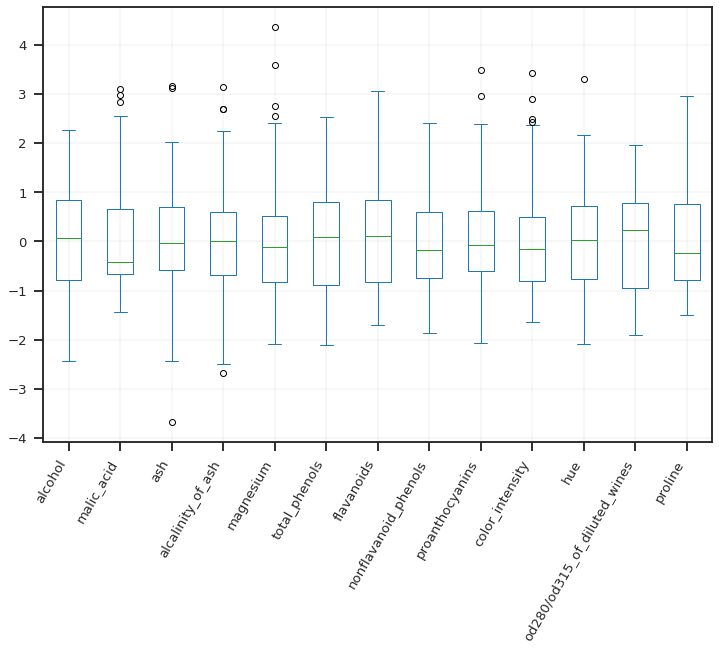

In [ ]:
df_wines_scaled = df_wines.apply(scale)

df_wines_scaled.plot.box()
plt.xticks(rotation=60, ha='right');

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [ ]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

10

In [ ]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

## Verificando melhor K

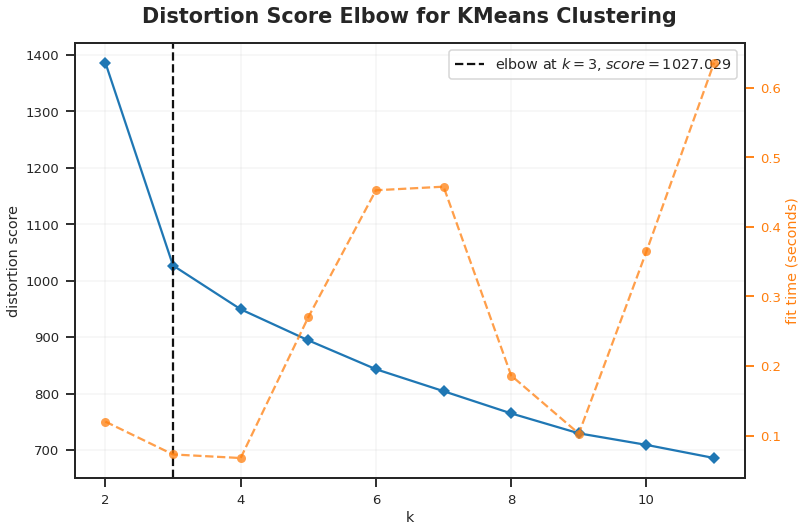

In [ ]:
kelbow_visualizer(KMeans(), df_wines_scaled, k=11);

## Clusterizando

Criando e treinando modelo

In [ ]:
model = KMeans(4, random_state=0).fit(df_wines_scaled)

Salvando centroides e labels

In [ ]:
centroids = model.cluster_centers_
labels = model.labels_

## Interpretando clusters

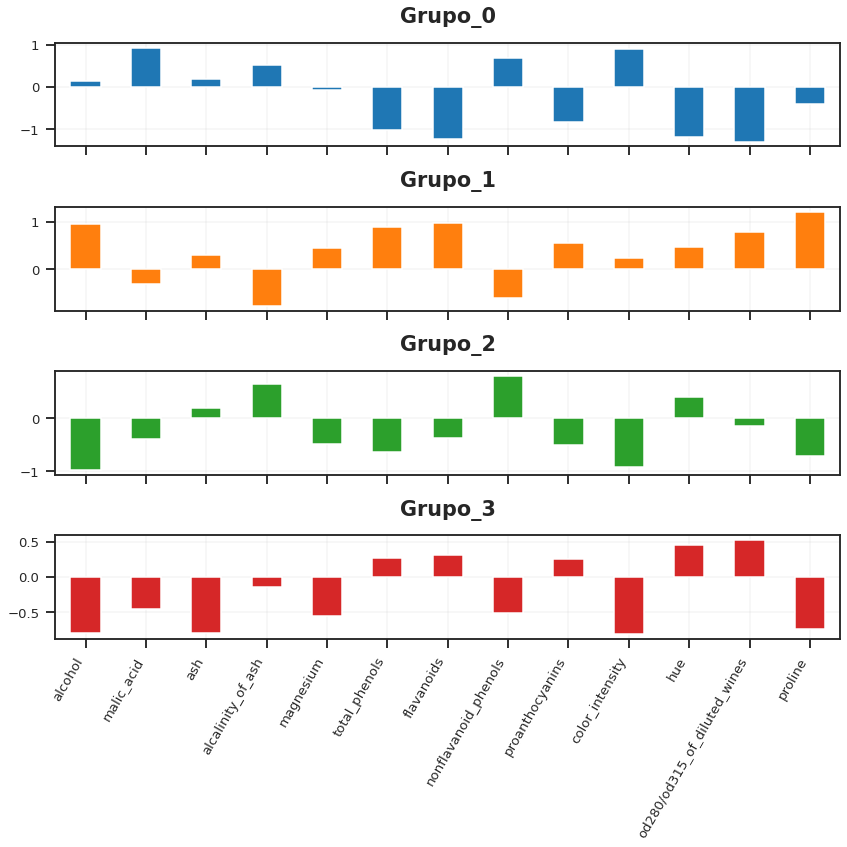

In [ ]:
(
  pd.DataFrame(centroids, columns=df_wines_scaled.columns)
  .T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
centers = pd.DataFrame(centroids, columns=df_wines.columns)
centers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.146964,0.937031,0.195499,0.528549,-0.076428,-1.026817,-1.237424,0.700397,-0.816473,0.903750,-1.179659,-1.296928,-0.398762
1,0.960537,-0.316354,0.309729,-0.774933,0.455725,0.897698,0.974760,-0.607763,0.563785,0.241598,0.463243,0.786065,1.220968
2,-0.974152,-0.395284,0.191113,0.648933,-0.490200,-0.628614,-0.367120,0.797288,-0.495663,-0.916222,0.401839,-0.154359,-0.709675
3,-0.786132,-0.453349,-0.790481,-0.143883,-0.549105,0.265048,0.316454,-0.502648,0.255705,-0.806486,0.453388,0.521338,-0.734021


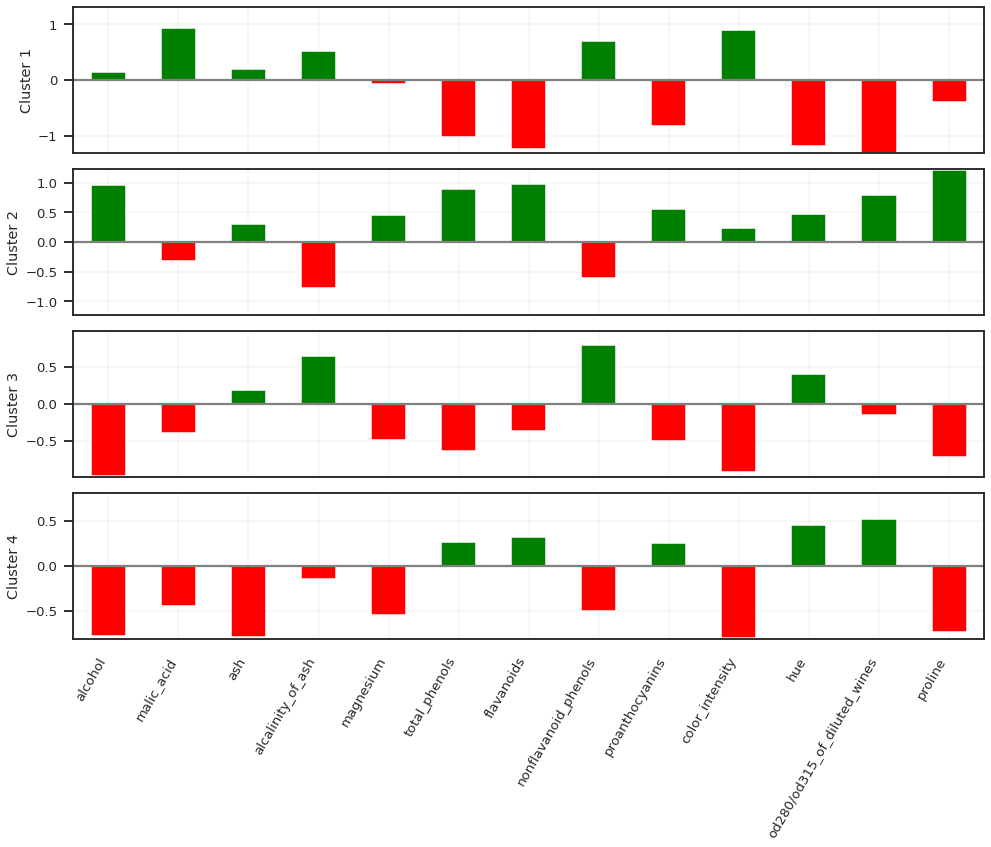

In [ ]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
(
  df_wines[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .agg(['mean','min','median','max'])
)

alcohol                       malic_acid                     \
              mean    min  median    max       mean   min median   max   
cluster                                                                  
0        13.119592  12.20  13.110  14.16   3.380204  1.24  3.300  5.65   
1        13.778214  12.85  13.765  14.83   1.983929  1.35  1.765  4.04   
2        12.212000  11.41  12.080  13.49   1.896000  0.74  1.630  4.43   
3        12.364211  11.45  12.335  13.86   1.831316  0.89  1.520  4.31   

              ash        ...    hue       od280/od315_of_diluted_wines        \
             mean   min  ... median   max                         mean   min   
cluster                  ...                                                   
0        2.420000  1.98  ...  0.670  0.96                     1.693469  1.27   
1        2.451250  2.04  ...  1.065  1.28                     3.168214  2.51   
2        2.418800  2.02  ...  0.980  1.45                     2.502400  1.59   
3        2.150263  1.70  ...  1.060  1.42                     2.980789  2.14   

                          proline                         
        median   max         mean    min  median     max  
cluster                                                   
0        1.680  2.47   621.673469  372.0   620.0   880.0  
1        3.170  4.00  1130.303571  735.0  1100.0  1680.0  
2        2.500  3.30   524.040000  315.0   495.0   870.0  
3        3.035  3.64   516.394737  278.0   479.0  1020.0  

[4 rows x 52 columns]

In [ ]:
(
  df_wines[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
alcohol,13.119592,13.778214,12.212000,12.364211
malic_acid,3.380204,1.983929,1.896000,1.831316
ash,2.420000,2.451250,2.418800,2.150263
alcalinity_of_ash,21.255102,16.914286,21.656000,19.015789
magnesium,98.653061,106.232143,92.760000,91.921053
total_phenols,1.654286,2.855357,1.902800,2.460526
flavanoids,0.796735,3.000179,1.663600,2.344474
nonflavanoid_phenols,0.448776,0.286429,0.460800,0.299474
proanthocyanins,1.124898,1.912679,1.308000,1.736842
color_intensity,7.147347,5.616607,2.940000,3.193684


In [ ]:
silhouette_score(df_wines_scaled[~outlier_rows], labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.24989859662052233